In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import all the modules I need for the lab

In [2]:
import geopandas
import pandas
import numpy
import matplotlib.pyplot as plt
import datetime as dt

# Question 1
 Create a single chart that shows (a) annual emissions from the steel sector in China since 2018; and (b) annual emissions from the rest of the world since 2018. (Hint: stacked bar chart is the one of the easiest ways to answer this question, given what we learned in lecture.) Bonus if you can do this by month since January 2018.

In [3]:
#read file
steel = geopandas.read_file("https://raw.githubusercontent.com/danhammer/envirods/main/data/steel.geojson")

In [4]:
#Get date from the data and then get year
steel["date"] = pandas.to_datetime(steel["end_date"])
steel["year"] = steel["date"].dt.year
steel.head()

,start_date,end_date,asset_name,iso3_country,CO2_emissions,geometry,date,year
0,2015-01-01,2015-01-31,GHC Emirates Steel Industries Abu Dhabi plant,ARE,62492.0,POINT (54.46799 24.32203),2015-01-31,2015
1,2015-01-01,2015-01-31,Kurum International Elbasan steel plant,ALB,21088.0,POINT (20.02612 41.09461),2015-01-31,2015
2,2015-01-01,2015-01-31,ArcelorMittal Acindar Villa Constitución steel...,ARG,28164.0,POINT (-60.30042 -33.24994),2015-01-31,2015
3,2015-01-01,2015-01-31,TenarisSiderca Campana steel plant,ARG,21537.0,POINT (-58.97739 -34.15255),2015-01-31,2015
4,2015-01-01,2015-01-31,Ternium Siderar San Nicolás steel plant,ARG,317156.0,POINT (-60.13870 -33.37365),2015-01-31,2015


In [5]:
#Extract the data of china since 2018 from the whole data
china = steel[(steel["year"] >= 2018)&(steel['iso3_country'] == 'CHN')]

#Group the data by year and sum all the CO2_emissions
china = china.groupby('year').sum()
china

,CO2_emissions
year,
2018,1.109047e+09
2019,1.189093e+09
2020,1.244525e+09
2021,1.202083e+09
2022,5.788335e+08


In [6]:
#Get the data of world except china since 2018
world =  steel[(steel["year"] >= 2018) & (steel['iso3_country'] != 'CHN')]

#Group the data by year and then sum all the CO2_emissions
world = world.groupby('year').sum()
world

,CO2_emissions
year,
2018,853580782.0
2019,877472081.0
2020,814907387.0
2021,865652478.0
2022,409707090.0


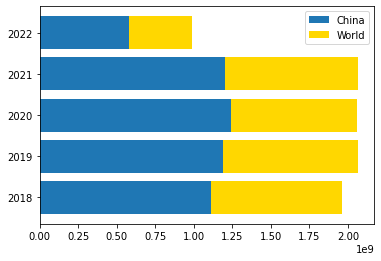

In [7]:
#Create a stacked bar graph 
plt.barh(
    china.index,
    china["CO2_emissions"],
    label='China'
)

plt.barh(
    world.index,
    world["CO2_emissions"],
    left=china["CO2_emissions"],
    label='World',
    color='gold'
)

plt.legend()

## By month

In [8]:
#Get the data of china since 2018
china_month = steel[(steel["start_date"] >= '2018-01-01')&(steel['iso3_country'] == 'CHN')]

#Group them by start_date and sum all the numbers
china_month = china_month.groupby('start_date').sum()
china_month.head()

,CO2_emissions,year
start_date,,
2018-01-01,94467282.0,655850
2018-02-01,84480300.0,655850
2018-03-01,93033901.0,655850
2018-04-01,90929830.0,655850
2018-05-01,95308491.0,655850


In [9]:
#Get the data of world except china since 2018
world_month = steel[(steel["start_date"] >= '2018-01-01')&(steel['iso3_country'] != 'CHN')]

#Group all the data by start_date and sum all them
world_month = world_month.groupby('start_date').sum()
world_month.head()

,CO2_emissions,year
start_date,,
2018-01-01,73156529.0,1051378
2018-02-01,65618337.0,1051378
2018-03-01,74281613.0,1051378
2018-04-01,70849094.0,1051378
2018-05-01,71410253.0,1051378


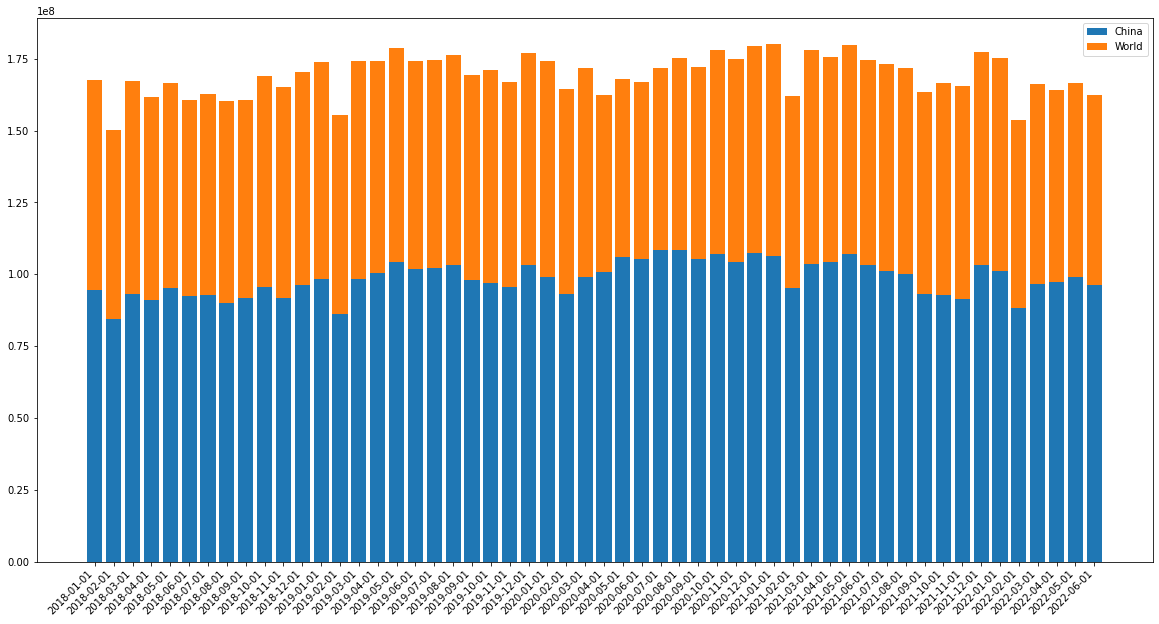

In [10]:
#Create stacked bar chart
plt.figure(figsize=(20,10))

plt.bar(
    china_month.index,
    china_month["CO2_emissions"],
    label='China'
)

plt.bar(
    world_month.index,
    world_month["CO2_emissions"],
    bottom=china_month["CO2_emissions"],
    label='World'
)

plt.xticks(rotation=45,ha='right')

plt.legend()

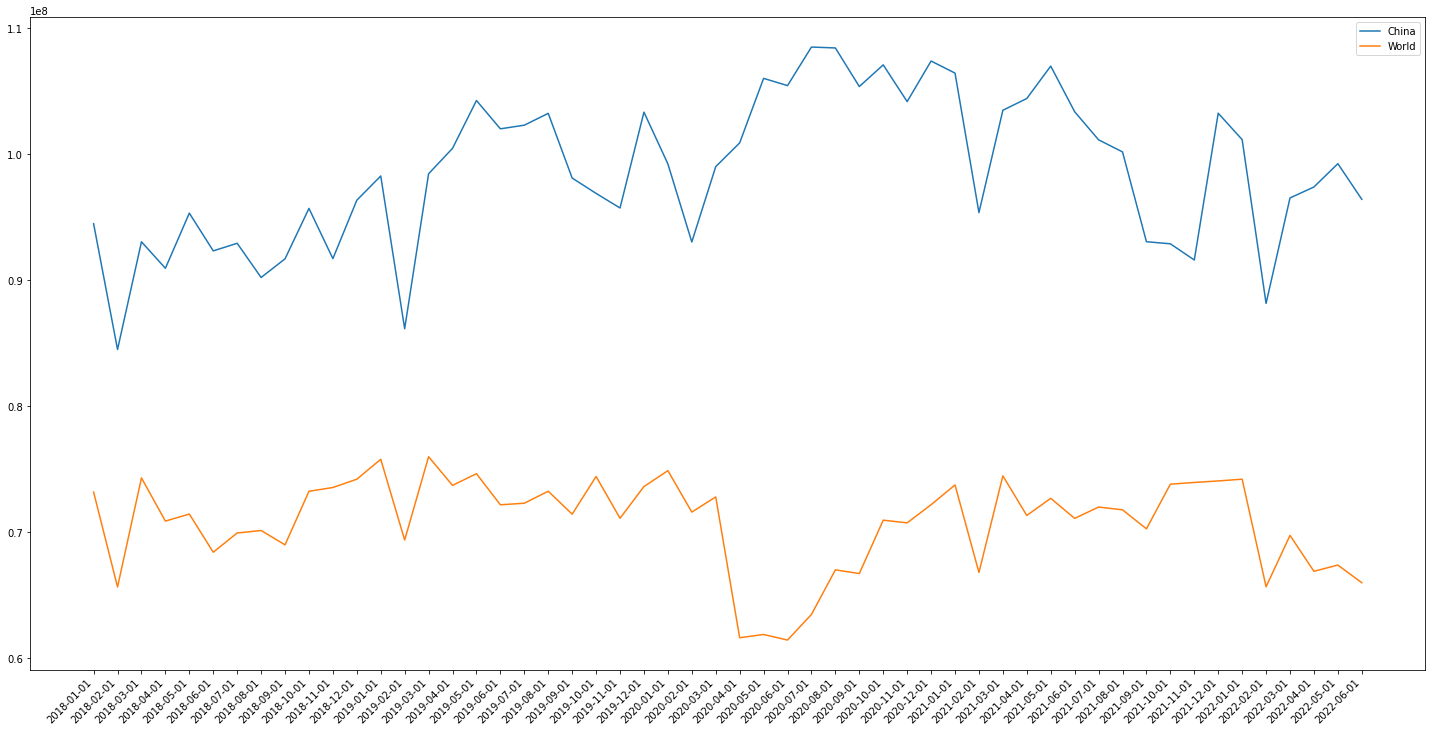

In [11]:
#Create a line chart
plt.figure(figsize=(25,12))

plt.plot(
    china_month.index,
    china_month["CO2_emissions"],
    label='China'
)

plt.plot(
    world_month.index,
    world_month["CO2_emissions"],
    label='World'
)
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.show()

# Question 2
What proportion of steel emissions since 2019 have come from the top 20 highest-emitting facilities in the world over that timeframe?

#### Proportion of steel emissions since 2019 from the top 20 highest-emitting facilities in the world

In [12]:
#Get the data since 2019
world_emit = steel[(steel["year"] >= 2019)]

#Group the data by 'asset_name' and sum the data
world_emit = world_emit.groupby('asset_name').sum()

#Sort the values by CO2_emissions
top_20 = world_emit.sort_values('CO2_emissions',ascending=False).head(20)

In [13]:
#Get the proportion
sum(top_20['CO2_emissions']) / sum(world_emit['CO2_emissions'])

0.19722632980360624

#### Proportion of steel emissions from the top 20 highest-emitting facilities in the world

In [14]:
#Group the data by asset_name and sum CO2_emissions
#Also reset the index
df = steel.groupby("asset_name").sum()['CO2_emissions'].reset_index()

#Sort the values by CO2_emissions
top_emitter = df.sort_values("CO2_emissions",ascending=False)
top_emitter.head(20)

,asset_name,CO2_emissions
383,"Jiangsu Shagang Group Co., Ltd.",302438928.0
549,POSCO Gwangyang steel plant,268672856.0
550,POSCO Pohang steel plant,211613684.0
36,"Angang Steel Co., Ltd.",182490153.0
466,"Ma'anshan Iron & Steel Co., Ltd.",173034048.0
781,"Wuhan Iron and Steel Co., Ltd.",159133595.0
102,"Baoshan Iron and Steel Co., Ltd. Headquarters",157732579.0
333,Hyundai Steel Dangjin steel plant,155819265.0
359,JFE West Japan Works (Fukuyama) steel plant,155526425.0
586,"Rizhao Steel Holding Group Co., Ltd.",128372096.0


In [15]:
#Get the proportion
sum(top_emitter[0:20]["CO2_emissions"]) / sum(steel["CO2_emissions"])

0.2039737492929502